In [218]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, LassoCV

In [219]:
rentals = pd.read_pickle('/Users/bekcunning/metis/project_files/luther/RankedNbhds')

In [220]:
rentals['constant'] = [1 for d in rentals.Rent]

In [221]:
rentals.columns

Index(['Address', 'Bath', 'Beds', 'Features', 'Kitchen', 'LivingSpace',
       'Outdoor', 'Parking', 'Pets', 'Rent', 'Sqft', 'Zip', 'uFeatures',
       'neighborhood', 'Rank', 'Pets Allowed', 'High Speed Internet Access',
       'Ceiling Fan', 'Tub/Shower', 'Double Vanities', 'Alarm', 'Washer/Dryer',
       'Air Conditioning', 'Storage Units', 'Smoke Free', 'Fireplace',
       'Heating', 'Cable Ready', 'Gated', 'Balcony', 'Patio', 'Sundeck',
       'Courtyard', 'Rooftop', 'Grill', 'Picnic Area', 'Waterfront', 'Deck',
       'Fenced Lot', 'Garden', 'Lawn', 'Yard', 'Porch', 'constant'],
      dtype='object')

In [222]:
fewer_rentals = rentals.loc[:, ['constant','Sqft', 'Beds', 'Bath', 'Parking', 'Pets Allowed', 'High Speed Internet Access', 'Ceiling Fan', 'Tub/Shower', 'Double Vanities', 'Alarm', 'Washer/Dryer', 'Air Conditioning', 'Storage Units', 'Smoke Free', 'Fireplace', 'Heating', 'Cable Ready', 'Gated', 'Balcony', 'Patio', 'Sundeck', 'Courtyard', 'Rooftop', 'Grill', 'Picnic Area', 'Waterfront', 'Deck', 'Fenced Lot', 'Garden', 'Lawn', 'Yard', 'Porch', 'constant']]
X=rentals.loc[:,['constant']]

y=rentals['Rent']

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

# Challenge 1

In [232]:

# First let us fit only on a constant
selected_columns_1 = ['constant']

In [233]:
lr_model1 = LinearRegression()
lr_model1.fit(X_train.loc[:,selected_columns_1],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [239]:
### Get the predictions on the training set
test_set_pred1 = lr_model1.predict(X_test.loc[:,selected_columns_1])

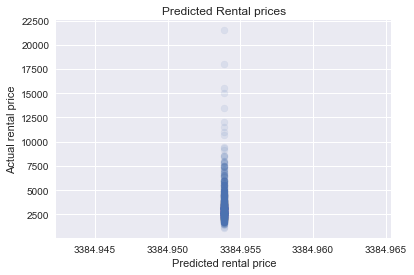

In [253]:
### Plot the predicted values
fig, ax = plt.subplots()
plt.scatter(test_set_pred1,y_test,alpha=.1)
plt.title("Predicted Rental prices")
ax.ticklabel_format(useOffset=False)
plt.ylabel('Actual rental price')
plt.xlabel('Predicted rental price');


 ### How can you interepret the results of this model? What does it predict?
 It is just predicting the mean for everything

(array([ 447.,  295.,   56.,   19.,    4.,    2.,    2.,    1.,    1.,    1.]),
 array([ -2284.9538621,   -244.9538621,   1795.0461379,   3835.0461379,
          5875.0461379,   7915.0461379,   9955.0461379,  11995.0461379,
         14035.0461379,  16075.0461379,  18115.0461379]),
 <a list of 10 Patch objects>)

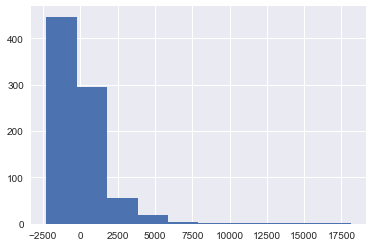

In [144]:
plt.hist(y_test-test_set_pred1)

### How are the residuals distributed?

The residuals are distributed exponentially

In [311]:
fewer_rentals = rentals.loc[:, ['Sqft', 'Beds', 'Bath', 'Parking', 'Pets Allowed', 'High Speed Internet Access', 'Ceiling Fan', 'Tub/Shower', 'Double Vanities', 'Alarm', 'Washer/Dryer', 'Air Conditioning', 'Storage Units', 'Smoke Free', 'Fireplace', 'Heating', 'Cable Ready', 'Gated', 'Balcony', 'Patio', 'Sundeck', 'Courtyard', 'Rooftop', 'Grill', 'Picnic Area', 'Waterfront', 'Deck', 'Fenced Lot', 'Garden', 'Lawn', 'Yard', 'Porch', 'constant']]
X=fewer_rentals.loc[:,['Sqft']]

y=rentals['Rent']

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

# Challenge 2 
Repeat the problem above, but add a continuous predictor variable

In [313]:
# fit on Sqft
selected_columns_2 = ['Sqft']

In [314]:
lr_model2 = LinearRegression()
lr_model2.fit(X_train.loc[:,selected_columns_2],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [315]:
### Get the predictions on the test set
test_set_pred2 = lr_model2.predict(X_test.loc[:,selected_columns_2])

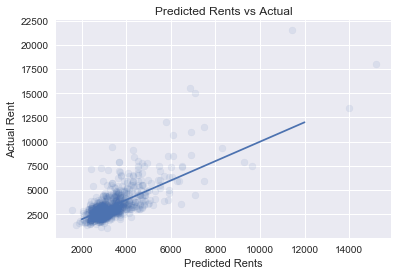

In [316]:
## Plot predicted vs actual 
ax, fig = plt.subplots()
plt.title("Predicted Rents vs Actual")
plt.xlabel("Predicted Rents")
plt.ylabel("Actual Rent")
plt.scatter(test_set_pred2,y_test,alpha=.1)
plt.plot(np.linspace(2000,12000,1000),np.linspace(2000,12000,1000));

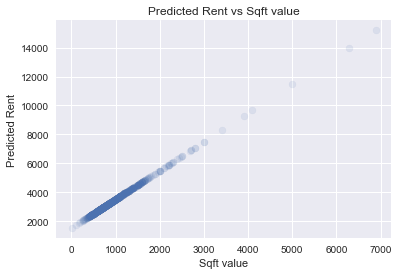

In [324]:
## Plot predicted vs actual 
ax, fig = plt.subplots()
plt.title("Predicted Rent vs Sqft value")
plt.xlabel("Sqft value")
plt.ylabel("Predicted Rent")
plt.scatter(X_test['Sqft'],test_set_pred2,alpha=.1);

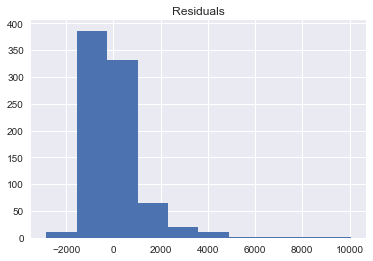

In [309]:
plt.title('Residuals')
plt.hist(y_test-test_set_pred2);

### Question: How can you interpret what's happening in the model?
The residuals are moving toward a normal distribution; the model is improving

In [264]:
fewer_rentals = rentals.loc[:, ['Sqft', 'Beds', 'Bath', 'Parking', 'Pets Allowed', 'High Speed Internet Access', 'Ceiling Fan', 'Tub/Shower', 'Double Vanities', 'Alarm', 'Washer/Dryer', 'Air Conditioning', 'Storage Units', 'Smoke Free', 'Fireplace', 'Heating', 'Cable Ready', 'Gated', 'Balcony', 'Patio', 'Sundeck', 'Courtyard', 'Rooftop', 'Grill', 'Picnic Area', 'Waterfront', 'Deck', 'Fenced Lot', 'Garden', 'Lawn', 'Yard', 'Porch', 'constant']]
X=fewer_rentals.loc[:,['Sqft', 'Pets Allowed']]

y=rentals['Rent']

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

# Challenge 3

In [266]:
# fit on Sqft and Pets Allowed (a dummy variable)
selected_columns_3 = ['Sqft', 'Pets Allowed']

In [267]:
lr_model3 = LinearRegression()
lr_model3.fit(X_train.loc[:,selected_columns_3],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [268]:
lr_model3.coef_, lr_model3.intercept_

(array([   2.02997566,  301.13101639]), 1323.9843041904951)

In [278]:
### Get the predictions on the training set
train_set_pred3 = lr_model3.predict(X_train.loc[:,selected_columns_3])

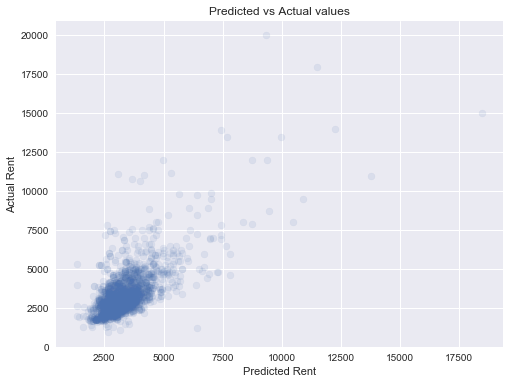

In [288]:
fig, ax = plt.subplots()
plt.title("Predicted vs Actual values")
plt.xlabel('Predicted Rent')
plt.ylabel('Actual Rent')
fig.set_size_inches(8,6)
plt.scatter(train_set_pred3,y_train,alpha=.1);


In [289]:
### Get the predictions on the test set
test_set_pred3 = lr_model3.predict(X_test.loc[:,selected_columns_3])

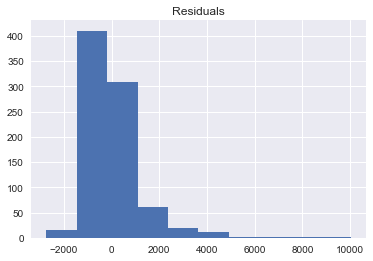

In [325]:
plt.title('Residuals')
plt.hist(y_test-test_set_pred3);

### Question: How can you interpret what's happening in the model?

Not much of an improvement, probably because this dummy variable has a very small impact and ones and zeros are not predicted well with a linear model

# Challenge 4: Enhance your model with more variables and observe

In [293]:
X = rentals.loc[:, ['Sqft', 'Beds', 'Bath', 'Parking', 'Pets Allowed', 'High Speed Internet Access', 'Ceiling Fan', 'Tub/Shower', 'Double Vanities', 'Alarm', 'Washer/Dryer', 'Air Conditioning', 'Storage Units', 'Smoke Free', 'Fireplace', 'Heating', 'Cable Ready', 'Gated', 'Balcony', 'Patio', 'Sundeck', 'Courtyard', 'Rooftop', 'Grill', 'Picnic Area', 'Waterfront', 'Deck', 'Fenced Lot', 'Garden', 'Lawn', 'Yard', 'Porch']]

y=rentals['Rent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [294]:
# fit on all variables

In [295]:
lr_model4 = LinearRegression()
lr_model4.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [301]:
### Get the predictions on the training set
train_set_pred4 = lr_model4.predict(X_train)

In [302]:
### Get the predictions on the test set
test_set_pred4 = lr_model4.predict(X_test)

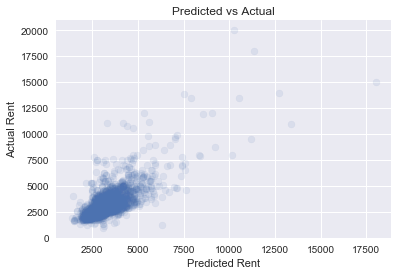

In [307]:
fig, ax = plt.subplots()
plt.title('Predicted vs Actual')
plt.xlabel("Predicted Rent")
plt.ylabel('Actual Rent')
plt.scatter(train_set_pred4, y_train,alpha=.1);

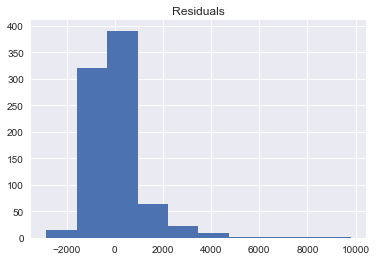

In [308]:
plt.title('Residuals')
plt.hist(y_test-test_set_pred4);

The model is improving but linear is not the best fit because there is a large variation in rent depending on location(a non continuous numerical variable).